# Basic Statistics for Data Analysis

Notebook written by Sunmi Yoon (Data Analyst, Data Analysis Instructor)  
Contact: ysunmi0427@gmail.com, https://www.linkedin.com/in/yoonsunmi/

통계는 데이터를 다루는 수리적인 기법입니다. '평균'이라는 단어는 이걸 공부를 따로 해야하는건가 싶을 정도로 진부하지만, 데이터를 통해 나온 평균을 제대로 해석하기 위해서는 통계를 제대로 공부해야 합니다. 오늘 시간에는 평균, 분산, 표준편차와 같이 진부한 단어들을 새롭게 바라보는 일을 해보겠습니다. Box and Whisker Plot, Correlation heat map과 같이 기초 통계 시각화도 살펴봅시다. 통계의 모든 것을 가르치는게 아니라, 통계를 더 공부하고 싶게 만드는게 오늘의 목표입니다! 더불어 머리로 알고있는 통계 개념들을 코드로 옮기는 연습도 함께합시다.

*연습문제를 풀면서 따라오세요. (심화)가 붙어있는 문제는 시도해보고 어렵다면 건너뛰어도 무방합니다.*

In [42]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import statistics
from collections import Counter

In [45]:
# Please insure the version of matplotlib==3.1.0 for seaborn heatmap
# There is a little issue when drawing heatmap which cuts first and last low in half.
# If you have matplotlib version 3.1.1, please uninstall matplotlib and install version 3.1.0. Thanks!
# https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

import matplotlib
print(matplotlib.__version__)

3.1.0


### Matplotlib 3.1.1을 가지고 계신 분들은
On Terminal,
1. `pip uninstall matplotlib` or `pip3 uninstall matplotlib` 
2. `pip install matplotlib==3.1.0` or use pip3

## 캐글 데이터 API로 데이터 다운로드 받기
0. `pip install kaggle` 또는 `pip3 install kaggle`
1. import kaggle로 OSError를 본다
2. kaggle 로그인 > My Account > Create New API Token을 클릭해 `kaggle.json` 파일을 다운로드 받는다.
3. OSError에서 알려준 디렉토리에 넣는다. Mac의 경우에는 command 명령어 `mv [현재파일위치] [옮기고싶은위치]`
4. `!kaggle competitions download -c titanic -p [원하는 다운로드 위치]`를 실행한다.

In [2]:
import kaggle

In [3]:
# !kaggle competitions download -c titanic -p ./Data/kaggle/

In [4]:
titanic = pd.read_csv('./Data/kaggle/train.csv')

In [5]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 데이터의 출처
https://www.kaggle.com/c/titanic/data


* survival  
* pclass	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	
* Age	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

*더 자세한 Variable Notes는 링크에*

## 워밍업!

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Null 있는지 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Summary 해석
* 데이터는 총 891명의 타이타닉 탑승자를 대상으로 합니다.
* Survived 컬럼의 평균이 0.3838이고, 살았을 때에 값은 1, 사망했을 때의 값은 0인 것으로 보아 데이터에 들어있는 사람 중 살아있는 사람은 38%입니다.
* Ticket의 등급은 1, 2, 3이고 평균이 2.30인 것을 보아 1등급보다는 2~3등급의 사람들이 더 많은 것으로 보입니다.
* 평균 나이는 29.69세이며 가장 어린 승객은 채 만 1살이 안 되었고(0.42), 최고령자는 80세였습니다.
* 운임은 평균 32였고 최저는 0, 최고는 512이며 std가 49.69인 것으로보아 승객들의 운임차이는 적지 않습니다.

### Q1. 실제로 Ticket의 등급은 어떤 분포를 합니까? 티켓 등급 별 승객수를 구하세요.

### Q2. 티켓 등급 별 사망자, 생존자를 구하세요. 티켓의 등급이 생존률에 영향을 미치나요?

# 오늘은(내일까지 일수도) 이런 것들을 새롭게 배웁니다.

1. Central Tendency 중심경향성
    - Mean 평균
    - Median 중앙값
    - Mode 최빈값
2. Measure of Variation 산포의 척도
    - Range, Interquartile Range 범위, 사분범위
    - Variance, Standard Deviation 분산, 표준편차
    - Coefficient of Variation 변동 계수
3. Box and Whisker Plot
4. Correlation 상관관계
5. Correlation and Causation 상관관계와 인과관계
6. 기초통계가 모든 것을 설명하지는 않는다
    1. 평균, 분산, 상관관계의 함정. [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)
    2. 상관관계의 함정
7. Simpson's Paradox 심슨의 역설

# 1. Central Tendency 중심경향성
데이터의 중심이 어디있는지를 나타내는 지표를 중심경향성(Central Tendency)라고 합니다. 대부분 평균(Average)를 사용하는데요, 필요에 따라 Median(중앙값), 최빈값(Mode)를 사용하기도 합니다. 평균에도 종류가 굉장히 많은데요. 산술평균, 기하평균, 조화평균, 가중산술평균에 대해서 들어보신적이 있을겁니다. 다양한 평균에 대해서는 『세상에서 가장 쉬운 통계학 입문』을 참고해주세요!

In [10]:
a = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
# 산술평균
def mean(x):
    return sum(x) / len(x)

In [12]:
mean(a)

4.5

산술평균의 데이터의 모든 값에 영향을 받는다는 특징이 있어요. 예를들어 리스트 a의 가장 큰 값을 100으로 바꿔보겠습니다.

In [13]:
a[7] = 100
a

[1, 2, 3, 4, 5, 6, 7, 100]

In [14]:
mean(a)

16.0

이에 비교해 중앙값(Median)은 데이터의 모든 값에 영향을 받지는 않습니다. 리스트의 가장 큰 값이 1000으로 바뀐다고 하더라도, 기존의 중앙값을 유지합니다. 모든 데이터의 변화를 감지하여 유연하게 움직이는 평균과는 다릅니다.  
중앙값은 데이터에서 가장 중앙에 있는 포인트를 의미하며, 데이터 포인터가 짝수개라면 전체 데이터에서 가장 중앙에 있는 두 데이터 포인트의 산술평균을 의미합니다. 데이터 포인트가 짝수일때, 홀수일때 계산 방법이 다르므로 계산이 약간 복잡하죠? 중앙값을 구하는 함수 median()을 직접 구현해봅시다.

### Q3. 중앙값을 계산하는 함수를 구현하세요. (심화)

In [15]:
def median(x):
    '''
    x의 중앙값을 계산하는 함수를 구현하세요.
    '''
    pass

In [16]:
# Q3을 위한 힌트

# 테스트를 위해 파이썬 내장라이브러리인 statistics의 median 함수를 활용
print(statistics.median([1, 2, 3]))
print(statistics.median([1, 2, 3, 4]))

# 리스트 정렬
print(sorted([3, 2, 1]))


# 나누기의 몫
print(4 // 2)

2
2.5
[1, 2, 3]
2


분위는 중앙값을 포함하는 개념으로 데이터를 크기 순서대로 정렬했을때 어디에 위치해 있는지를 뜻합니다. 중앙값은 50분위를 의미합니다. Pandas의 `describe()` 함수에서도 25%, 50%, 75% 들을 본 적이 있을겁니다. 여기에서 50%가 데이터를 순서대로 정렬했을 때 그 중앙, 중앙값을 의미합니다. 다른 방법으로도 간단하게 계산할 수 있습니다. 데이터의 이상치(Outlier: 지나치게 값이 크거나, 작거나, 대부분의 데이터들과는 패턴이 아주 다른 값)를 다룰 때에 `quantile()`함수를 자주 사용합니다.

In [17]:
print(titanic['Age'].quantile(0.1))
print(titanic['Age'].quantile(0.5))
print(titanic['Age'].quantile(0.9))

14.0
28.0
50.0


평균, 중앙값 이외에 최빈값(Mode)도 가끔 사용합니다. 데이터에서 가장 많이 등장하는 값을 의미하며 꼭 하나는 아닐 수 있습니다. 간단하게는 statistics의 `statistics.mode()`함수로 계산할 수 있습니다.

In [18]:
statistics.mode([1, 2, 3, 3, 4])

3

하지만 최빈값이 2개 이상일 때 `statistics.mode()` 함수는 에러를 출력합니다. `StatisticsError: no unique mode; found 2 equally common values`

In [20]:
# statistics.mode([1, 2, 3, 3, 4, 4])

### Q4. 최빈값이 2개 이상일 때에는 리스트를 출력하는 함수를 만들어 봅시다. (심화)

In [21]:
def mode(x):
    '''최빈값이 2개 이상일 때 리스트를 출력합니다'''
    pass

In [22]:
# Q4를 위한 힌트
ex = ['A', 'A', 'B', 'B', 'C']

# 리스트안에 있는 각 요소와, 요소의 갯수를 세서 딕셔너리 형태로 반환해주는 Counter 함수
cnt = Counter(ex)
print(cnt)

# Counter의 다양한 보조함수
print(cnt.values())
print(cnt.items())

Counter({'A': 2, 'B': 2, 'C': 1})
dict_values([2, 2, 1])
dict_items([('A', 2), ('B', 2), ('C', 1)])


# 2. Measure of Variation 산포의 척도
데이터가 얼마나 퍼져있는지를 나타냅니다. 정규교육을 밟으면서 우리는 산포의 척도 중 분산과 표준편차를 배웠습니다. 나머지는 이보다도 더 쉽습니다. 직관적으로 생각해보면 데이터의 최대값에서 최소값을 뺀 것도 데이터가 얼마나 퍼져있는지를 나타내줄 수 있겠지요. 이를 `range`라고 정의할 수 있습니다.

In [23]:
def data_range(x):
    return max(x) - min(x)

In [24]:
data_range([1, 2, 3, 4, 100])

99

비슷하게 데이터의 상위 25%에 해당하는 값과 하위 25%에 해당하는 값의 차이를 계산해 볼 수도 있겠지요. 이를 특별히 `interquartile range`라고 부릅니다. 타이타닉 데이터를 활용해볼까요? 타이타닉 탑승객 나이의 interquartile range는 아래와 같습니다.

In [25]:
titanic['Age'].quantile(0.75) - titanic['Age'].quantile(0.25)

17.875

### Q5. 주어진 리스트의 interquartile range를 구하는 함수를 구현하세요.

In [26]:
def interquartile_range(x):
    pass

In [27]:
# Q5를 위한 힌트

# 리스트의 quantile를 계산하는데 numpy의 함수를 활용하세요.
np.quantile([1, 2, 3, 4, 5], 0.25)

2.0

학창시절의 기억을 되살려서 분산과 표준편차를 구해볼까요. 간단하게는 numpy의 `np.var()`, `np.std()` 함수를 사용할 수 있지만 이 함수들을 사용하지 않고 구현해봅시다. Pandas의 `df.describe()` 함수의 결과에서도 표준편차를 볼 수 있습니다. `std`를 봐주세요. 표준편차 값이 클수록 데이터가 퍼져있음을 의미합니다.

In [28]:
print(np.var([1, 2, 3, 4, 5]))
print(np.std([1, 2, 3, 4, 5]))

2.0
1.4142135623730951


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q6. 분산을 계산하는 함수를 구현하세요.

In [30]:
def variance(x):
    '''
    1. 리스트의 각 요소에서 평균을 뺀다. (편차)
    2. 평균을 뺀 값들을 제곱한다. (편차의 제곱)
    3. 편차의 제곱을 평균한다. (편차의 제곱의 평균)
    '''
    pass

In [31]:
# Q6을 위한 힌트

# 리스트의 평균구하기
print(np.mean([1, 2, 3])) # numpy의 mean() 함수 활용
print(mean([1, 2, 3])) # 위에 구현한 mean() 함수 사용

# 파이썬에서 제곱하기
print(2**2)
print(3**2)

2.0
2.0
4
9


### Q7. 표준편차를 구현하세요.

In [32]:
def standard_deviation(x):
    pass

In [33]:
# Q7을 위한 힌트

# 제곱근 구하기
math.sqrt(4)

2.0

# 3. Box and Whisker Plot
* Box and Whisker Plot의 개념 설명에 대해서 잘 설명된 글: https://boxnwhis.kr/2019/02/19/boxplot.html
* [Pandas로 Box and Whisker Plot 그리기 official manual](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)

### Q8. 나이는 생존에 영향이 있었을까요? Pandas groupby 함수를 사용해서 알아보세요.

In [34]:
# Answer

## Box and Whisker Plot with Pandas

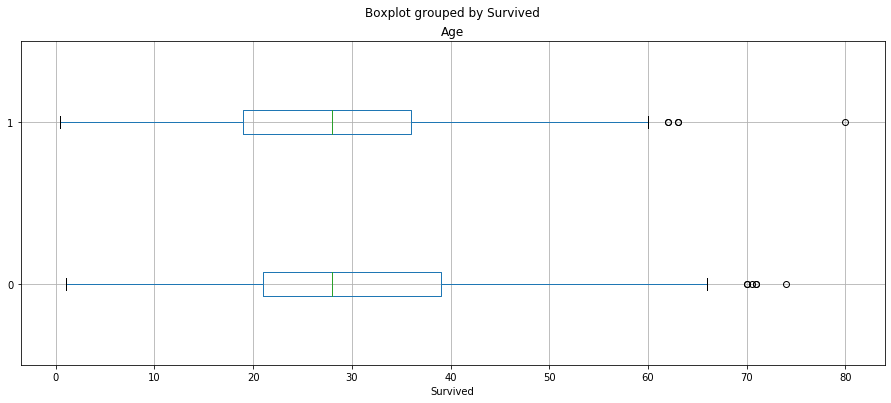

In [47]:
titanic.boxplot(column=['Age'], by='Survived', figsize=(15,6), vert=False)

### Q9. Box and Whisker Plot의 결과를 해석해보세요.

# 4. Correlation 상관관계

두 변수 사이에 어떤 관계(Correlation)가 있는지 알아보기 위해서 우리는 공분산, 상관계수같은 개념을 이용합니다. 상관관계는 공분산을 X, Y 각각의 표준편차를 나눠 계산하며 -1(완벽한 음의 상관관계)에서 1(완벽한 양의 상관관계) 사이의 값을 가집니다. 상관관계가 0이라면 X, Y간의 그 어떤 양의 또는 음의 상관관계가 없음을 의미합니다. 만약 상관관계가 0.2라면 상대적으로 약한 양의 상관관계를 가진다 말 할 수 있습니다.
* Mathematical notation: https://en.wikipedia.org/wiki/List_of_mathematical_symbols_by_subject

### Q10. 공분산을 계산하는 함수 `covariance()`를 구현하세요.

\begin{align}
\sigma(X, Y) = \dfrac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x}) (y_i - \bar{y}) 
\end{align}

In [36]:
def covariance(x, y):
    pass

In [37]:
# 10번 문제를 쉽게 풀기위한 힌트

# numpy의 dot() 함수는 각 성분별로 곱한 값을 더해줍니다. 
np.dot([1, 2], [1, 2]) # (1*1 + 2*2 = 5)

5

### Q11. 상관계수를 계산하는 함수 `correlation()`를 구현하세요.

\begin{align}
\rho(X, Y) = \dfrac{\sigma(X, Y)}{\sigma(X) \sigma(Y)}
\end{align}

In [38]:
def correlation(x, y):
    pass

Pandas에서는 데이터프레임 전체의 관계를 한 눈에 살펴볼 수 있도록 `corr()` 함수를 제공합니다.

In [39]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


seaborn이라는 시각화 라이브러리를 이용해 heatmap을 그려 볼 수도 있습니다.

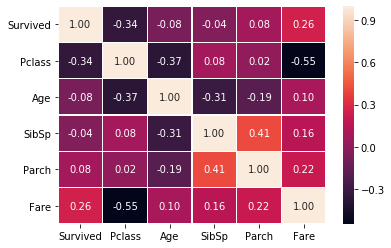

In [40]:
sns.heatmap(titanic.drop('PassengerId', axis=1).corr(), annot=True, fmt = '.2f', linewidths=0.2)
plt.show()

### Q12. Correlation matrix를 해석해보세요.
참고자료: https://www.slideshare.net/ssuser2fe594/2107-80754131 p56부터

* Answer
* Answer

# 5. Correlation and Causation 상관관계와 인과관계

![Correlation is not Causation](http://commons.trincoll.edu/cssp/wp-content/blogs.dir/68/files/2013/12/CorrelationCausationFinal1.jpg)

# 6. 기초통계가 모든 것을 설명하지는 않는다.

## 1. 평균, 분산, 상관관계의 함정. [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)

## 2. 상관관계의 함정

# 7. Simpson's Paradox 심슨의 역설
* https://en.wikipedia.org/wiki/Simpson's_paradox